# Introduction

The aim of this report is to provide a descriptive and exploratory analysis on comparing Uber pickups with other for-hire vehicles over time.
The report will also help the business to identify opportunities and help the client determine their next steps in the FHV market.

## Tools
- <b>Language</b>: Python 3.8.5
- <b>Integrated development environment</b>: Jupyter Notebook 6.1.4

In [89]:
# importing the libraries
import pandas as pd
import datetime # to extract weekday
import seaborn as sns # for graphs
import matplotlib.pyplot as plt

## Exploring the aggregated trip dataset

This data eas explored first to do a high-level comparison between Uber and other FHV providers. It contains the aggregate analysis on taxi and FHV trips, came directly from the TLC (Taxi & Limousine Commission).<br><br>
Please note that I have included Taxis (Yellow taxis and Green taxis) in the analysis. This is because I wasn't sure whether these taxis are a part of the FHV system or not. Since the taxi data was also included in the agreated trip dataset, I've included them in the analysis as well.

In [103]:
# the first sheet in the excel file is related to trips per day
trips_per_day = pd.read_excel("Aggregate FHV Data.xlsx", sheet_name='Trips Per Day')
trips_per_day.head()

,Date,American,Carmel,Dial 7,Diplo,Firstclass,Highclass,Prestige,Skyline,Lyft,Uber,Yellow Taxis,Green Taxis
0,2014-07-01,921,2871,2233,1046,1744,1368,3345,1668,0,21228,440655,38167
1,2014-07-02,1028,2965,2409,1275,2228,1661,3533,1691,0,26480,434416,42472
2,2014-07-03,1068,3361,2520,1200,2121,1599,3649,1157,0,21597,412980,46046
3,2014-07-04,1008,2174,1955,1171,1459,1622,3401,337,0,14148,306773,41535
4,2014-07-05,1214,1846,1371,1371,1703,1898,4081,276,0,10890,305653,46873


In [104]:
# understanding the structure of the dataset
trips_per_day.describe()

,American,Carmel,Dial 7,Diplo,Firstclass,Highclass,Prestige,Skyline,Lyft,Uber,Yellow Taxis,Green Taxis
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,996.869565,2788.250000,2119.478261,1071.195652,1812.706522,1651.358696,3485.228261,1388.000000,2909.793478,28842.739130,421398.934783,43213.739130
std,164.835930,382.765892,298.369617,163.539170,147.317221,246.792059,435.345135,629.758981,2443.941383,6353.066019,40868.292990,7500.264023
min,768.000000,1846.000000,1371.000000,810.000000,1211.000000,1315.000000,2781.000000,276.000000,0.000000,10890.000000,305653.000000,29186.000000
25%,860.000000,2453.000000,1912.250000,936.500000,1742.000000,1456.500000,3111.500000,621.000000,0.000000,24922.500000,398623.250000,37335.750000
50%,944.000000,2882.500000,2193.000000,1030.000000,1802.000000,1602.500000,3350.000000,1634.500000,2512.500000,28791.500000,430251.500000,41118.500000
75%,1114.500000,3079.750000,2348.250000,1227.000000,1900.750000,1816.500000,3878.250000,1897.750000,4876.500000,32316.250000,444734.750000,47802.500000
max,1440.000000,3507.000000,2795.000000,1440.000000,2228.000000,2375.000000,4470.000000,2230.000000,7740.000000,43205.000000,509480.000000,64184.000000


### Key insights
- The dataset doesn't have any NA values as the count of all columns is 92.
- On average, <b>Yellow Taxis (421,398)</b> and <b>Green Taxis(43,213)</b> have the most rides per day.
- Apart from the taxis, among the FHV, <b>Uber (28,842)</b> has the most rides per day followed by <b>Prestige (3485)</b>.
- There are days when trips per day for Lyft were 0. These might be the days when the company was not operational.

In [105]:
trips_per_day.Date.min()

Timestamp('2014-07-01 00:00:00')

In [106]:
trips_per_day.Date.max()

Timestamp('2014-09-30 00:00:00')

The Data is from 1st July 2014 to 30th Sptember 2014

Next, in order to compare FHVs, we would compare the market share of each FHV. <br><br>
We need to reshape the data to have the FHV company name in one column.

In [107]:
trip_data = trips_per_day.melt(id_vars="Date", var_name="Company", value_name="TripsPerDay").reset_index(drop=True)
trip_data.head()

,Date,Company,TripsPerDay
0,2014-07-01,American,921
1,2014-07-02,American,1028
2,2014-07-03,American,1068
3,2014-07-04,American,1008
4,2014-07-05,American,1214


In [108]:
# checking if there are days when the trips per day is 0
trip_data[trip_data.TripsPerDay==0]

,Date,Company,TripsPerDay
736,2014-07-01,Lyft,0
737,2014-07-02,Lyft,0
738,2014-07-03,Lyft,0
739,2014-07-04,Lyft,0
740,2014-07-05,Lyft,0
741,2014-07-06,Lyft,0
742,2014-07-07,Lyft,0
743,2014-07-08,Lyft,0
744,2014-07-09,Lyft,0
745,2014-07-10,Lyft,0


It seems Lyft was not operational from 2014-07-01 to 2014-07-24.

In [109]:
# for market share, we can group by FHV company and sum the trips per day
market = trip_data.groupby('Company').sum('TripsPerDay')
# caculating market share
market['MarketShare'] = round(market.TripsPerDay/market.TripsPerDay.sum()*100,3)
market_data = market.sort_values('MarketShare', ascending=False)
market_data

,TripsPerDay,MarketShare
Company,,
Yellow Taxis,38768702,82.356
Green Taxis,3975664,8.445
Uber,2653532,5.637
Prestige,320641,0.681
Lyft,267701,0.569
Carmel,256519,0.545
Dial 7,194992,0.414
Firstclass,166769,0.354
Highclass,151925,0.323


We can clearly see the dominance of Yellow Taxis in NYC from 1st July 2014 to 30th Sptember 2014 in NYC.

### Key Insights
- Yellow Taxis and Green Taxis occupy more than 90% of the market
- Uber also has an important share of more than 5% of the market

It would be interesting to know how the market changed from 1st July 2014 to 30th Sptember 2014.

In [165]:
trip_data['Month'] = trip_data['Date'].dt.month_name()
trip_data['Month_num'] = trip_data['Date'].dt.month
market = trip_data.groupby(['Company', 'Month']).sum('TripsPerDay').reset_index().sort_values(['Company','Month_num']).drop('Month_num',1)
trip_data = trip_data.drop('Month_num',1)
market

,Company,Month,TripsPerDay,Weekday_num
1,American,July,30348,90
0,American,August,31483,99
2,American,September,29881,85
4,Carmel,July,87102,90
3,Carmel,August,83622,99
5,Carmel,September,85795,85
7,Dial 7,July,67076,90
6,Dial 7,August,63610,99
8,Dial 7,September,64306,85
10,Diplo,July,33809,90


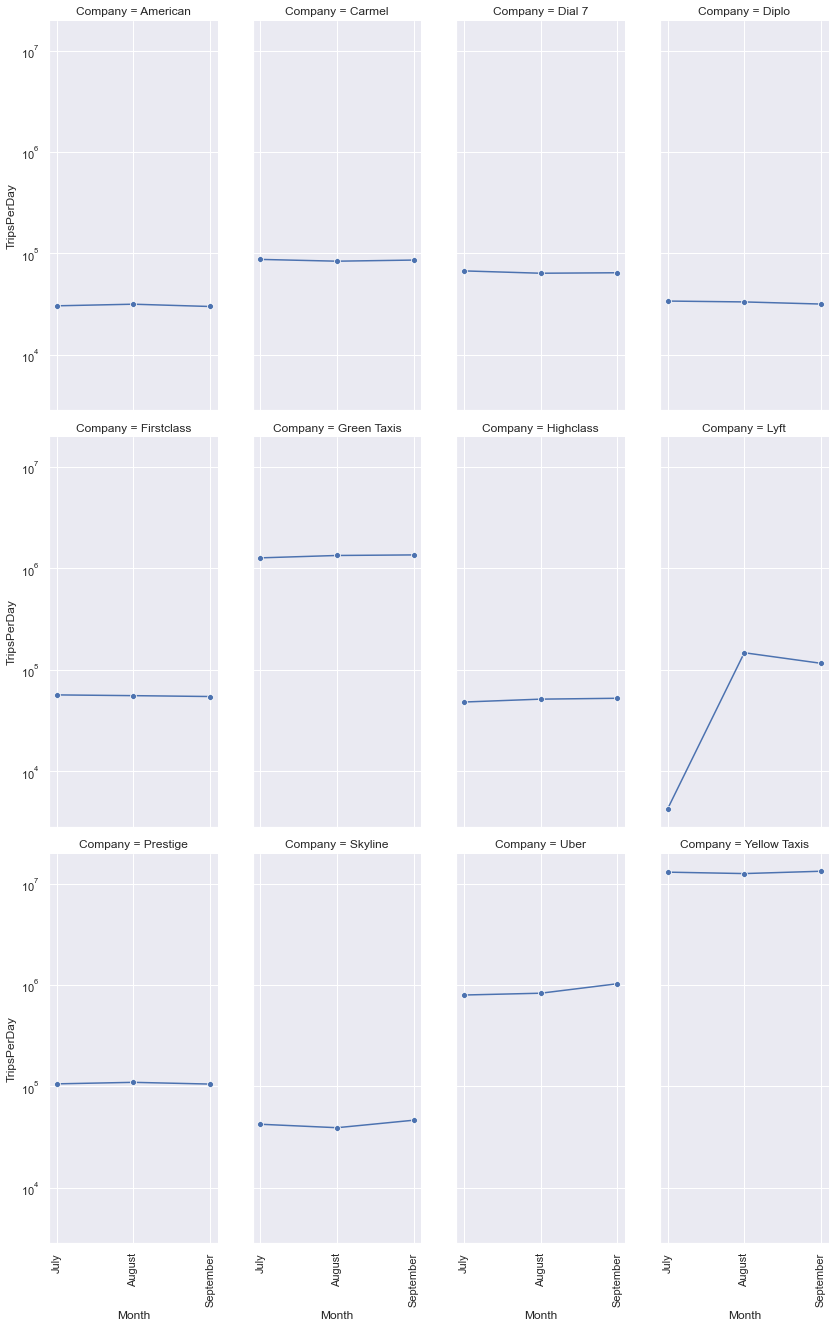

In [189]:
g = sns.FacetGrid(market, col="Company", col_wrap=4, height=6, aspect=.5)
g.map(sns.lineplot, "Month", "TripsPerDay", marker='o').set(yscale = 'log')
g.set_xticklabels(rotation=90)

### Key Insights
- Uber and Skyline trips increased by around 20% from August to September. More research should be done related to this. Did they offer special offers during the period? Did they perform targeted marketing within a region?
- Lyft customers decreased from August to September by around 20%. This might be beacause they started their operation in July, therefore, attracted a large set of customers by offering discounts in the initial month. Later, in September some customers left leading to Lyft's poor retention rate. More research need to be done related to this.

Let us find more patterns related to trips over the period.

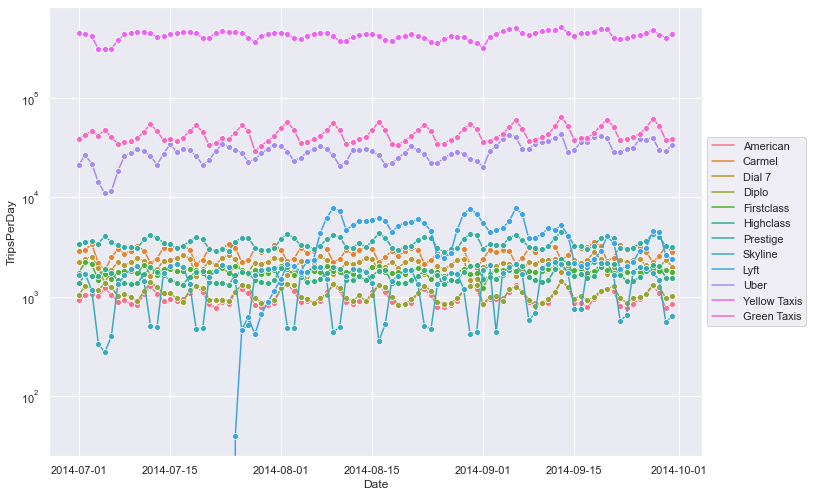

In [166]:
# plotting trips per day over the time period
sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.lineplot(x='Date',y='TripsPerDay', hue='Company', marker='o',
             data=trip_data)
g.set_yscale("log")
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

It can be seen that there is a particular pattern in all the FHVs. It maybe related to the weekdays. Let us explore that.

In [167]:
# extracting weekday from the date
trip_data['Weekday'] = trip_data['Date'].dt.day_name()
trip_data['Weekday_num'] = trip_data['Date'].dt.weekday

In [168]:
trip_data.head(10)

,Date,Company,TripsPerDay,Month,Weekday,Weekday_num
0,2014-07-01,American,921,July,Tuesday,1
1,2014-07-02,American,1028,July,Wednesday,2
2,2014-07-03,American,1068,July,Thursday,3
3,2014-07-04,American,1008,July,Friday,4
4,2014-07-05,American,1214,July,Saturday,5
5,2014-07-06,American,1048,July,Sunday,6
6,2014-07-07,American,893,July,Monday,0
7,2014-07-08,American,916,July,Tuesday,1
8,2014-07-09,American,841,July,Wednesday,2
9,2014-07-10,American,823,July,Thursday,3


In [169]:
trip_day_data = trip_data.groupby(['Company', 'Weekday']).sum('TripsPerDay').reset_index().sort_values(['Company','Weekday_num']).drop(['Weekday_num'],1)
trip_day_data

,Company,Weekday,TripsPerDay
1,American,Monday,11055
5,American,Tuesday,12011
6,American,Wednesday,11373
4,American,Thursday,11844
0,American,Friday,14366
...,...,...,...
83,Yellow Taxis,Wednesday,5672786
81,Yellow Taxis,Thursday,5763263
77,Yellow Taxis,Friday,5724966
79,Yellow Taxis,Saturday,5652648


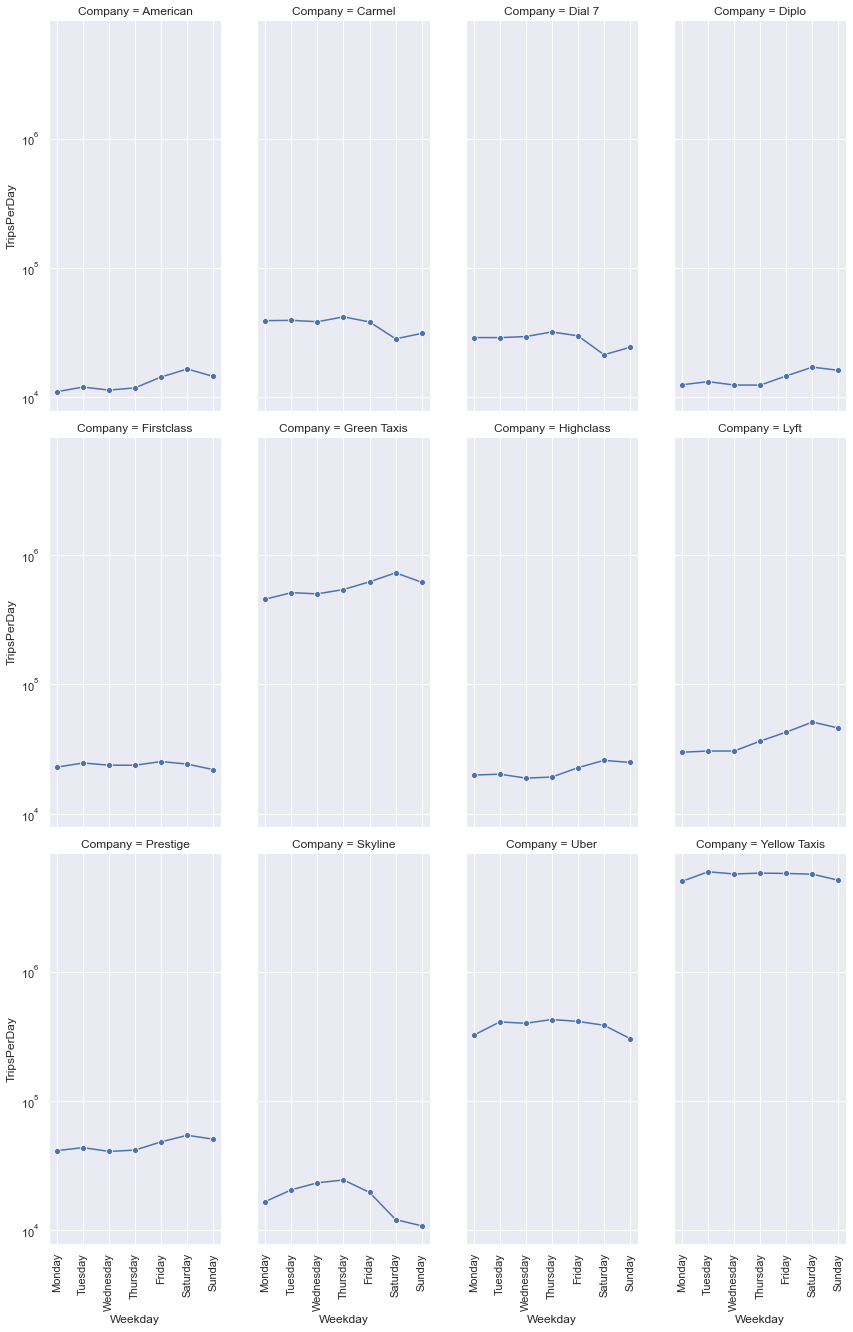

In [187]:
g = sns.FacetGrid(trip_day_data, col="Company", col_wrap=4, height=6, aspect=.5)
g.map(sns.lineplot, "Weekday", "TripsPerDay", marker='o').set(yscale = 'log')
g.set_xticklabels(rotation=90)

There are different patterns in different FHV companies.
### Key insights
- Companies like Carmel, Skyline and Dial 7 have relatively quieter Saturdays than weekdays.
- Companies like Uber, FirstClass and Yellow Taxis have a similar trend. They also have an relatively large increasing trend from mondays to tuesdays. Also, they have quieter Sundays than Saturdays. Maybe they have offers specifically for working-class people. 
- Companies like Green Taxis and Lyft have an intreasing trend throughout the weekdays, peaking on Saturdays. They also have a relatively quiter Wednesdays.
- Comapnies like American, Green Taxis, Lyft, Prestige, HighClass, Diplo have busier Saturdays and Sundays thean the working days. Maybe they have offers on weekends.

### Business opportunities
Although this requires more analysis on different datasets, some business opportunites might be:
- As Lyft started in mid-July 2014, there had a good customer engagement initially (maybe they offered new customer discounts) but had retention issues in the month of September. We can identify the stragies for long-term customer engagement. Maybe we can build loyalty programs for our business. 
- Also, the high market share companies (Yellow taxis, green taxis, Uber) have lower number of trips on Sundays. We can grab this opportunity to offer special discounts on that day.

# Conclusion

The analysis focused on exploratory analysis of the data. It can be improved by utilised other data sources.
- More trip data could be utilised to perform monthly cohort analysis. This will help us to find the retention rate of different FHV companies. More research could then be done on finding strategies to better customer experience, retention rate and new customer engagement.
- More data could be utilised to find preference of people using FHV for short distance or long distance travel.
- Fuel prices and employee protests data could be used to further get insights about the FHV companies
- The trip data used in the analysis should be normalised as there is a large difference in number of trips of different FHV companies. It would help to further get better insights into the data provided.

In [5]:
data

,LocationID,Borough,Zone
0,1,EWR,Newark Airport
1,2,Queens,Jamaica Bay
2,3,Bronx,Allerton/Pelham Gardens
3,4,Manhattan,Alphabet City
4,5,Staten Island,Arden Heights
...,...,...,...
260,261,Manhattan,World Trade Center
261,262,Manhattan,Yorkville East
262,263,Manhattan,Yorkville West
263,264,Unknown,Unknown


In [11]:
data_janjune15 = pd.read_csv(ipath + "uber-raw-data-janjune-15.csv")

In [12]:
data_janjune15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


In [22]:
data_apr14 = pd.read_excel("Data/Aggregate FHV Data.xlsx")
data_apr14.head(50)

,Date,American,Carmel,Dial 7,Diplo,Firstclass,Highclass,Prestige,Skyline,Lyft,Uber,Yellow Taxis,Green Taxis
0,2014-07-01,921,2871,2233,1046,1744,1368,3345,1668,0,21228,440655,38167
1,2014-07-02,1028,2965,2409,1275,2228,1661,3533,1691,0,26480,434416,42472
2,2014-07-03,1068,3361,2520,1200,2121,1599,3649,1157,0,21597,412980,46046
3,2014-07-04,1008,2174,1955,1171,1459,1622,3401,337,0,14148,306773,41535
4,2014-07-05,1214,1846,1371,1371,1703,1898,4081,276,0,10890,305653,46873
5,2014-07-06,1048,2480,1872,1251,1501,1738,3545,401,0,11443,310376,40354
6,2014-07-07,893,3028,2213,1009,1768,1457,3284,1330,0,18280,374578,34130
7,2014-07-08,916,2706,2073,1065,1815,1387,3171,1634,0,25763,430482,35756
8,2014-07-09,841,2883,2209,987,1827,1342,3176,1897,0,27817,443822,36503
9,2014-07-10,823,3222,2425,904,1746,1367,3081,2047,0,30541,451208,39051
